# 9. 통계 기초

## 주요 내용

- 데이터 준비

- 데이터 살펴보기

- 중심경향성: 평균값, 중앙값, 최빈값

- 산포도: 분산, 표준편차, (사분)범위

- 상관관계: 공분산, 피어슨 상관관계

- 선형 상관관계

### 필수 모듈

- `matplotlib.pyplot`: 막대그래프, 히스토그램, 산점도 등 데이터 시각화에 유용한 모듈

In [1]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.rc('figure', figsize=(5, 3))  # 그래프 크기 지정

### matplotlib 한글 설정

- 그래프에서 한글을 사용하기 위한 필수 준비 작업

In [2]:
import platform
import matplotlib as mpl

# 윈도우 설정
if platform.system() == 'Windows':
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = mpl.font_manager.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font)
# 우분투/구글 코랩 설정
elif platform.system() == 'Linux':
    # 우분투/구글코랩의 경우 아래 명령문이 최소 한번 실행되어야 함
    # !sudo apt-get install -y fonts-nanum*
    # !fc-cache -fv
    
    font = "NanumBarunGothic"
    if not any(map(lambda ft: ft.name == font, mpl.font_manager.fontManager.ttflist)):
        mpl.font_manager.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
    plt.rc("font", family=font)
    plt.rc("axes", unicode_minus=False)

## 9.1. 데이터 준비

- 어떤 SNS의 회원 204명을 대상으로 친구가 몇 명인지를 조사한 결과
- 회원 아이디: 친구가 많은 순서대로 0, 1, 2, ... 등으로 정렬
- 리스트의 각 항목이 해당 회원의 친구 숫자
- 회원의 친구 숫자는 최대 100명, 최소 1명

In [3]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,
               15,15,15,14,14,13,13,13,13,12,12,11,10,10,
               10,10,10,10,10,10,10,10,10,10,10,10,10,9,
               9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,
               8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,
               7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
               6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
               5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
               4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
               3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,
               1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

### 리스트 정보 확인

리스트의 길이, 리스트에 포함된 항목의 최댓값과 최솟값을 이용해서 앞서 언급한 내용을 확인 가능

In [4]:
print(f"회원수:\t{len(num_friends)}명", 
      f"최대 친구 숫자:\t{max(num_friends)}명", 
      f"최소 친구 숫자:\t{min(num_friends)}명", sep='\n')

회원수:	204명
최대 친구 숫자:	100명
최소 친구 숫자:	1명


## 9.2. 데이터 살펴보기

- 정해진 수의 친구를 갖는 회원은 몇 명인지 확인하기

In [5]:
from collections import Counter

friend_counts = Counter(num_friends)
print(friend_counts)

Counter({6: 22, 1: 22, 4: 20, 3: 20, 9: 18, 5: 17, 2: 17, 10: 15, 7: 15, 8: 13, 15: 4, 13: 4, 21: 2, 19: 2, 18: 2, 14: 2, 12: 2, 100: 1, 49: 1, 41: 1, 40: 1, 25: 1, 16: 1, 11: 1})


### 막대 그래프

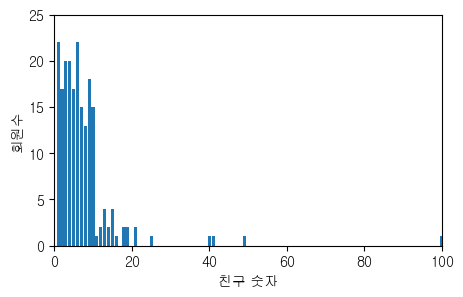

In [6]:
xs = range(101)                         # x축: 친구 숫자. 최소 1명에서 최대 100명.
ys = [friend_counts[x] for x in xs]     # y축: 지정된 수 만큼의 친구를 갖는 회원수

# 막대그래프 그리기
plt.bar(xs, ys)

# 그래프 설정
plt.axis([0, 100, 0, 25])        # x축은 0부터 100까지, y축은 0부터 25까지 눈금 사용
plt.xlabel("친구 숫자")           # x축 눈금 설명
plt.ylabel("회원수")              # y축 눈금 설명
plt.show()

## 9.3. 중심 경향성과 평균

### 평균의 종류

- 중심 경향성: 데이터가 어떤 값을 중심으로 몰려 있는 현상

- 보통 세 종류의 **평균**<font size='2'>average</font>을 사용
    - 평균값<font size='2'>mean</font>
    - 중앙값<font size='2'>median</font>
    - 최빈값<font size='2'>mode</font>

### 평균값

- $X$: 임의의 데이터셋
- $n$: $X$의 크기, 즉 데이터셋에 포함된 샘플의 개수

$$
\mu_X = E(X) = \frac{\sum^n_{i=1} X_i}{n}
$$

In [7]:
def mean(xs):
    """
    xs: 리스트로 구현된 데이터셋
    """

    return sum(xs) / len(xs)

In [8]:
mean(num_friends)

7.333333333333333

### 중앙값

데이터셋에 포함된 모든 데이터 샘플을
크기 순으로 정렬했을 때 중앙 위치에 자리잡은 값

<p><div style="text-align: center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/median.png" width="40%"></div>

In [9]:
# 리스트의 길이가 짝수일 때
def _median_even(xs):
    sorted_xs = sorted(xs)
    high_midpoint = len(xs) // 2
    mean_value = (sorted_xs[high_midpoint - 1] + sorted_xs[high_midpoint]) / 2
    return mean_value

# 리스트의 길이가 홀수일 때
def _median_odd(xs):
    sorted_xs = sorted(xs)
    midpoint = len(xs) // 2
    mean_value = sorted_xs[midpoint]
    return mean_value

# 짝수/홀수 구분
def median(xs):
    if len(xs) % 2 == 0:
        return _median_even(xs)
    else:
        return _median_odd(xs)

In [10]:
median(num_friends)

6.0

### 평균값 대 중앙값

- 평균값은 특정 값에 민감하게 변함
- 반면에 중앙값은 그렇지 않음.
- 아래 코드: `num_friends`에서 최대 친구 숫자를 100명에서 200명으로 바꾼 경우
- 평균값은 변하지만 중앙값은 그대로.

In [11]:
Y = num_friends.copy()
Y[0]=200
mean(Y)

7.823529411764706

In [12]:
median(Y)

6.0

### 이상치와 중앙값

- 이상치<font size='2'>outlier</font>: 다른 데이터 샘플들과 확연히 구분되는 데이터 샘플

- 예제: [2013년 3월 당시, 국회의원들의 평균재산은 94억 9000만원](https://www.datadata.link/qa08/)
    - 하지만 이상치값을 보인 두 의원을 제외하면 23억 3000만원
    - 이상치: 현대중공업의 대주주인 정몽준의 약 1조 9249만원 가량의 재산과 고희선 의원의 1984억원의 재산

### 이상치 발생 원인

- 국회의원의 평균재산의 이상치 처럼 정말로 특별한 경우

- 측정 기기 또는 방식의 오류

- 데이터 처리 오류 등

### 중앙값과 사분위수

<div style="text-align: center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/quantile.png" width="60%"></div>

### 사분위수 계산

In [13]:
def quantile(xs, p):
    """
    xs: 데이터셋
    p: 상위 p% 위치
    """
    
    xs_sorted = sorted(xs) # 정렬
    p_index = int(p * len(xs)) # p%에 해당하는 인덱스

    return xs_sorted[p_index]

In [14]:
print("제1사분위수:", quantile(num_friends, 0.25))
print("제3사분위수:", quantile(num_friends, 0.75))

제1사분위수: 3
제3사분위수: 9


### 최빈값

- 데이터셋에 포함된 데이터 샘플 중에서 가장 많이 출현하는 값이 **최빈값**<font size='2'>mode</font>

<p><div style="text-align: center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/unimodal-bimodal-multimodal.png" width="80%"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://calcworkshop.com/exploring-data/measures-of-center/">9+ Examples on Mean, Median, Mode</a>&gt;</div></p>

### 최빈값 계산 함수

In [15]:
def mode(xs):
    """
    최빈값
    """
    # Counter 객체 생성
    counts = Counter(xs)
    # 키값의 최댓값 확인
    max_count = max(counts.values())
    # 최대 키값을 갖는 키들의 집합
    modes = {x_i for x_i, count in counts.items() if count == max_count}
    return modes

In [16]:
mode(num_friends)

{1, 6}

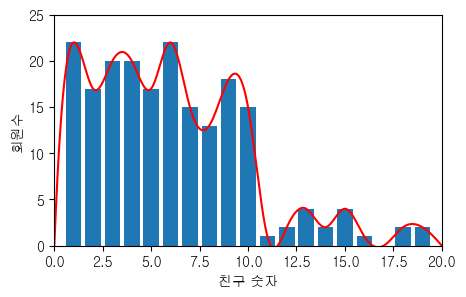

In [17]:
xs = range(21)                      # x축: 친구 숫자. 최소 1명에서 최대 30명.
ys = [friend_counts[x] for x in xs] # y축: 지정된 수 만큼의 친구를 갖는 회원수

# 막대그래프 그리기
plt.bar(xs, ys)

# 부드러운 선그래프 그리기
import numpy as np                               # numpy 라이브러리 활용
from scipy.interpolate import make_interp_spline # 부드러운 선을 그리기 위해 스플라인 보간법 적용

xs_ys_spline = make_interp_spline(xs, ys)
xs_ = np.linspace(min(xs), max(ys), 500)
ys_ = xs_ys_spline(xs_)
plt.plot(xs_, ys_, 'r')

# 그래프 설정
plt.axis([0, 20, 0, 25])         # x축은 0부터 20까지, y축은 0부터 25까지 눈금 사용
plt.xlabel("친구 숫자")           # x축 눈금 설명
plt.ylabel("회원수")              # y축 눈금 설명
plt.show()

### 비대칭 데이터셋의 평균값, 중앙값, 최빈값

<p><div style="text-align: center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/mean_mode_median.jpg" width="90%"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://medium.com/@nhan.tran/mean-median-an-mode-in-statistics-3359d3774b0b">Mean, Median, and Mode in Statistics</a>&gt;</div></p>

## 9.4. 산포도와 분산

### 산포도

- 데이터가 퍼져있는 정도

- 산포도가 0에 가까운 값이면 퍼져있지 않고 한 값 주위에 뭉쳐있다는 의미

- 반대로 0보다 클 수록 퍼져있는 정도가 커진다는 의미

- 산포도를 측정하는 기준
    * 범위
    * 사분범위
    * 분산
    * 표준편차

### 범위

- 데이터셋에 포함된 데이터 샘플의 최대값과 최소값의 차이

In [18]:
def data_range(xs):
    return max(xs) - min(xs)

In [19]:
data_range(num_friends)

99

### 사분범위

- 평균, 분산, 표준편차와 함께 범위도 이상치에 민감
- 데이터의 산포도를 보다 안정적으로 측정하기 위해 제1사분위수와 제3사분위수 사이의 범위인 사분범위 사용

In [20]:
def iqr(xs):
    """제3사분위수 - 제1사분위수"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

In [21]:
iqr(num_friends)

6

### 분산

- 데이터가 평균값을 중심으로 얼마나 퍼져있는지 측정

$$
\sigma = \textit{var}(X) = \frac{\sum^n_{i=1} (X_i - \mu_X)^2}{n-1}
$$

<div style="text-align: center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/Comparison_standard_deviations.svg.png" width="50%"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://en.wikipedia.org/wiki/Variance">위키백과</a>&gt;</div></p>

In [22]:
# 벡터 내적 함수
def dotV(v, w):
    assert len(v) == len(w), "벡터들의 길이가 동일해야 함"""

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def dev_mean(xs):
    """평균값과의 차이 계산"""
    mu = mean(xs)
    return [x - mu for x in xs]

def sum_of_squares(v):
    """반환값: v_1 * v_1 + ... + v_n * v_n"""
    return dotV(v, v)

In [23]:
def var(xs):
    """
    분산값 계산. 단, 2개 이상의 데이터가 있어야 함.
    """
    
    assert len(xs) >= 2, "두 개 이상의 데이터 필요"

    n = len(xs)
    deviations = dev_mean(xs)
    deviation_sum = sum_of_squares(deviations)
    return deviation_sum / (n - 1)

In [24]:
var(num_friends)

81.54351395730716

### 표준편차

$$s_X = \sqrt{\textit{var}(X)}$$

In [25]:
import math

def std(xs):
    return math.sqrt(var(xs))

In [26]:
std(num_friends)

9.03014473623248

## 9.5. 선형 상관관계

### 공분산과 피어슨 상관계수

- 두 종류의 데이터가 서로 상관이 있는가를 알고자 할 때 상관관계를 파악

- **공분산**<font size='2'>covariance</font> 또는 **피어슨 상관계수**<font size='2'>Pearson correlation coefficient</font> 이용

### 예제: 친구수와 SNS 활용 시간

- SNS 회원이 하루에 해당 SNS에서 보내는 시간과 친구 숫자 사이의 연관성 파악하기

In [27]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,
                 31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,
                 36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,
                 23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,
                 26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,
                 27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,
                 23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,
                 31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,
                 29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,
                 35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,
                 19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,
                 15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,
                 18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,
                 41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,
                 27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,
                 36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,
                 28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,
                 36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,
                 33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,
                 13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,
                 28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,
                 30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,
                 17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,
                 33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

### 공분산

- 동일한 모집단을 대상으로 수집된 두 데이터셋 $X$와 $Y$의 공분산 $cov(X, Y)$

$$
cov(X,Y) = \frac{\sum^n_{i=1} (X_i- \mu_X)(Y_i- \mu_Y)}{n-1}
$$

<div style="text-align: center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/positive_negative_weak_covariance.png" width="60%"></div>

<br>

- 친구 숫자와 사용시간 사이의 공분산은 22.43 정도

In [28]:
def cov(xs, ys):
    assert len(xs) == len(ys), "xs와 ys의 길이가 같아야 함."

    return dotV(dev_mean(xs), dev_mean(ys)) / (len(xs) - 1)

In [29]:
cov(num_friends, daily_minutes)

22.425435139573064

### 공분산의 한계

- 친구 숫자와 SNS 방문 시간이 평균값과 차이가 같은 방향으로 커지면 커질 수록 공분산도 커짐

- 하지만 그렇다고 해서 친구 숫자와 사용시간의 연관성이 더 깊어졌다라고 말하기는 어려움

### 피어슨 상관계수

- 피어슨 상관계수는 공분산을 각 데이터셋의 표준편차의 곱으로 나눔

$$
\textit{corrcoef}(X,Y) = \frac{cov(X,Y)}{s_X \cdot s_Y}
$$

- 피어슨 상관계수의 특징
    * -1과 1 사이의 값이다.
    * 1에 가까울 수록 양의 선형관계가 강해진다.
    * -1에 가까울 수록 음의 선형관계가 강해진다.
    * 0에 가까울 수록 선형관계가 매우 약해진다.

<div style="text-align: center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/Correlation.png" width="80%"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">위키백과</a>&gt;</div></p>

- 친구 숫자와 SNS 사용시간 사이의 피어슨 상관계수는 0.25
- 이는 두 데이터셋 사이의 상관 정도가 크지 않음을 의미한다. 

In [30]:
def corrcoef(xs, ys):
    assert len(xs) == len(ys), "xs와 ys의 길이가 같아야 함."

    stdev_x = std(xs) # xs의 표준편차
    stdev_y = std(ys) # ys의 표준편차

    if stdev_x > 0 and stdev_y > 0:
        return cov(xs, ys) / (stdev_x * stdev_y)
    else:
        return 0    # 표준편차가 0인 데이터셋과의 선형 상관관계는 없음.


In [31]:
corrcoef(num_friends, daily_minutes)

0.24736957366478216

### 산점도 활용

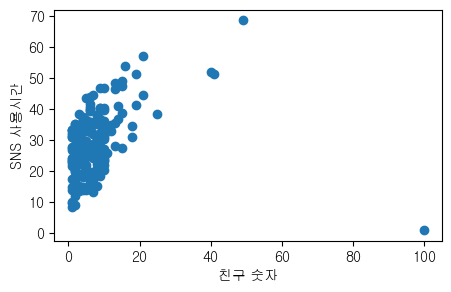

In [32]:
plt.scatter(num_friends, daily_minutes) # 산점도 그래프 그리기

# 그래프 설정
plt.xlabel("친구 숫자")
plt.ylabel("SNS 사용시간")
plt.show()

### 이상치와 상관관계

- 상관관계도 이상치로부터 영향을 받음

In [33]:
outlier = num_friends.index(100)    # 이상치의 인덱스

# 데이터셋에서 이상치 제거
num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]
daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]

# 상관계수 계산
corrcoef(num_friends_good, daily_minutes_good)

0.5736792115665573

### 이상치를 제거한 후의 산점도 그래프

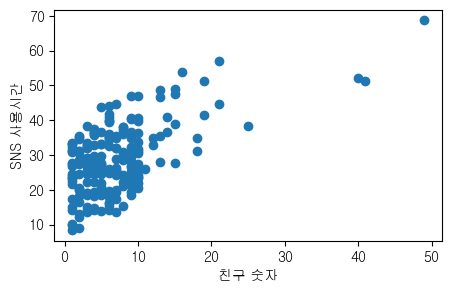

In [34]:
# 산점도 그리기
plt.scatter(num_friends_good, daily_minutes_good)

# 데이터 설정
plt.xlabel("친구 숫자")
plt.ylabel("SNS 사용시간")
plt.show()

### 피어슨 상관계수의 한계

- 상관관계가 0 또는 1에 아주 가깝다고 해서 반드시 어떤 관계도 없다거나 
    매우 밀접합 선형관계이다라고 섣부르게 결론 내리면 위험

### 예제

다음 두 개의 데이터셋 x와 y를 살펴보자. 

<table>
<tr>
    <td>x</td>
    <td>-2</td>
    <td>-1</td>
    <td>0</td>
    <td>1</td>
    <td>2</td>
</tr>
<tr>
    <td>y</td>
    <td>2</td>
    <td>1</td>
    <td>0</td>
    <td>1</td>
    <td>2</td>
</tr>
</table>

In [35]:
x = [-2, -1, 0, 1, 2]
y = [ 2,  1, 0, 1, 2]

corrcoef(x,y)

0.0

### 예제

다음 두 개의 데이터셋 x와 y를 살펴보자. 

<table>
<tr>
    <td>x</td>
    <td>-2</td>
    <td>-1</td>
    <td>0</td>
    <td>1</td>
    <td>2</td>
</tr>
<tr>
    <td>y</td>
    <td>99.98</td>
    <td>99.99</td>
    <td>100</td>
    <td>100.01</td>
    <td>100.02</td>
</tr>
</table>

In [36]:
x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]

corrcoef(x,y)

1.0

### 상관관계와 인과관계

- 두 데이터셋 사이에 상관관계가 있다고 해서 한 쪽이 다른 쪽에 영향을 주는 **인과관계**가 있다고 주장할 수 없음

- 두 데이터셋에 영향을 주는 다른 외부 요인이 존재할 수 있기 때문

- 예제: 친구 숫자와 SNS 사용시간
    1. SNS에서 많은 시간을 보낼 수록 많은 친구를 사귄다.
    1. 많은 친구가 있으니까 SNS에서 시간을 보다 많이 보낸다.
    1. SNS에서 많은 정보를 얻을 수 있으니까 사용시간이 길어지고, 그러다 보니까 친구가 늘어난다.

- 이 중에 어떤 것이 맞는지는 다른 방식으로 확인 필요

### 선형회귀: 머신러닝 활용

In [37]:
from sklearn import linear_model

xs = np.c_[np.array(num_friends_good)]
ys = np.c_[np.array(daily_minutes_good)]

lin_model = linear_model.LinearRegression()
lin_model.fit(xs, ys)

t0, t1 = lin_model.intercept_[0], lin_model.coef_[0][0]

print(f"절편:\t {t0}")
print(f"기울기:\t {t1}")

절편:	 22.947552413468976
기울기:	 0.9038659456058721


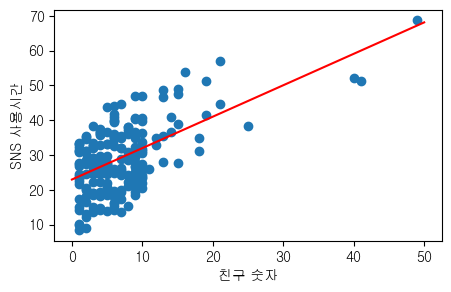

In [38]:
# 산점도 그리기
plt.scatter(num_friends_good, daily_minutes_good)

# 직선 그리기
X=np.linspace(0, 50, 100)
plt.plot(X, t0 + t1*X, "r")

# 데이터 설정
plt.xlabel("친구 숫자")
plt.ylabel("SNS 사용시간")
plt.show()